## Naive Bayes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv("/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_count_vectorized.csv")

In [3]:
X = data.drop("Label", axis=1)
y = data["Label"]

In [4]:
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
print("Full Dataset Sample:")
display(data.head())

print("Training Set Sample:")
display(X_train_full.head())

print("Testing Set Sample:")
display(X_test_full.head())

Full Dataset Sample:


,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,1,0,0,0,1,6,...,0,0,1,0,0,4,0,0,0,0


Training Set Sample:


,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
546,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
804,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Testing Set Sample:


,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
723,0,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("Training label Sample:")
display(y_train.head())

Training label Sample:


546    Positive
804    Negative
889    Positive
191    Positive
652    Negative
Name: Label, dtype: object

In [7]:
print("Testing label Sample:")
display(y_test.head())

Testing label Sample:


723    Negative
511    Positive
32     Negative
203    Positive
843    Negative
Name: Label, dtype: object

In [8]:
nb_model = MultinomialNB()
nb_model.fit(X_train_full, y_train)

y_pred = nb_model.predict(X_test_full)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy of Multinomial NB with all features: {accuracy:.4f}")

✅ Accuracy of Multinomial NB with all features: 0.6793


In [10]:
print("\n📝 Classification Report of Multinomial NB with all features:\n")
print(classification_report(y_test, y_pred))


📝 Classification Report of Multinomial NB with all features:

              precision    recall  f1-score   support

    Negative       0.68      0.74      0.71        98
    Positive       0.68      0.60      0.64        86

    accuracy                           0.68       184
   macro avg       0.68      0.67      0.68       184
weighted avg       0.68      0.68      0.68       184



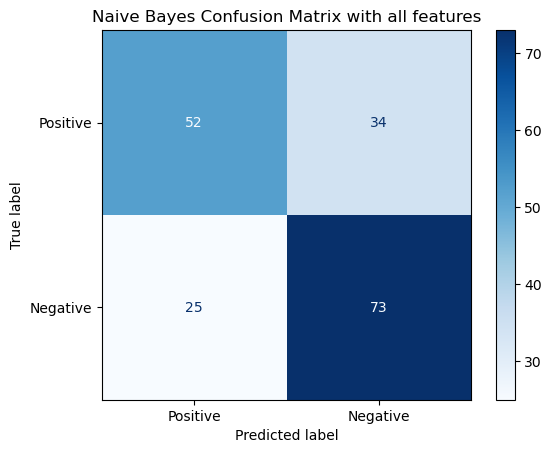

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix with all features")
plt.show()

#### Top 100 features

In [12]:
selector = SelectKBest(score_func=chi2, k=100)
X_train_top100 = selector.fit_transform(X_train_full, y_train)
X_test_top100 = selector.transform(X_test_full)

In [13]:
nb_model_top100 = MultinomialNB()
nb_model_top100.fit(X_train_top100, y_train)

y_pred_top100 = nb_model_top100.predict(X_test_top100)

In [14]:
accuracy = accuracy_score(y_test, y_pred_top100)
print(f"✅ Accuracy of Multinomial NB with top 100 features: {accuracy:.4f}")

✅ Accuracy of Multinomial NB with top 100 features: 0.6522


In [15]:
print("\n📝 Classification Report of Multinomial NB with top 100 features):\n")
print(classification_report(y_test, y_pred_top100))


📝 Classification Report of Multinomial NB with top 100 features):

              precision    recall  f1-score   support

    Negative       0.68      0.64      0.66        98
    Positive       0.62      0.66      0.64        86

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.65      0.65      0.65       184



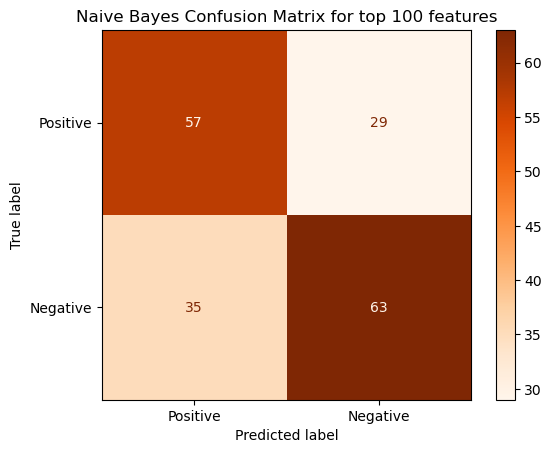

In [16]:
cm = confusion_matrix(y_test, y_pred_top100, labels=["Positive", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Naive Bayes Confusion Matrix for top 100 features")
plt.show()

## Decision Tree

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_full, y_train)

y_pred_dt = dt_model.predict(X_test_full)

In [18]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"✅ Accuracy of Decision Tree with all features: {accuracy:.4f}")
print("\nClassification Report for Decision Tree with all features:")
print(classification_report(y_test, y_pred_dt))

✅ Accuracy of Decision Tree with all features: 0.6413

Classification Report for Decision Tree with all features:
              precision    recall  f1-score   support

    Negative       0.66      0.67      0.67        98
    Positive       0.62      0.60      0.61        86

    accuracy                           0.64       184
   macro avg       0.64      0.64      0.64       184
weighted avg       0.64      0.64      0.64       184



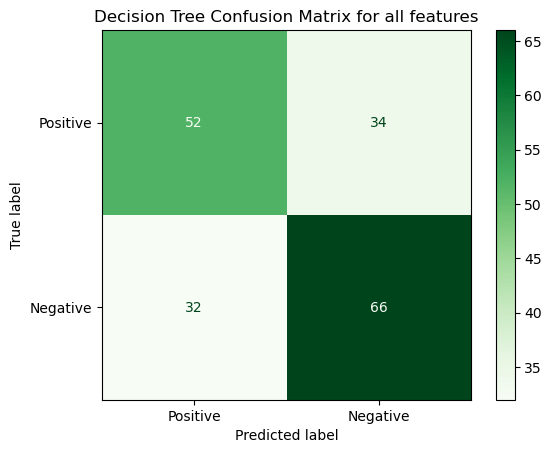

In [19]:
cm = confusion_matrix(y_test, y_pred_dt, labels=["Positive", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Greens)
plt.title("Decision Tree Confusion Matrix for all features")
plt.show()

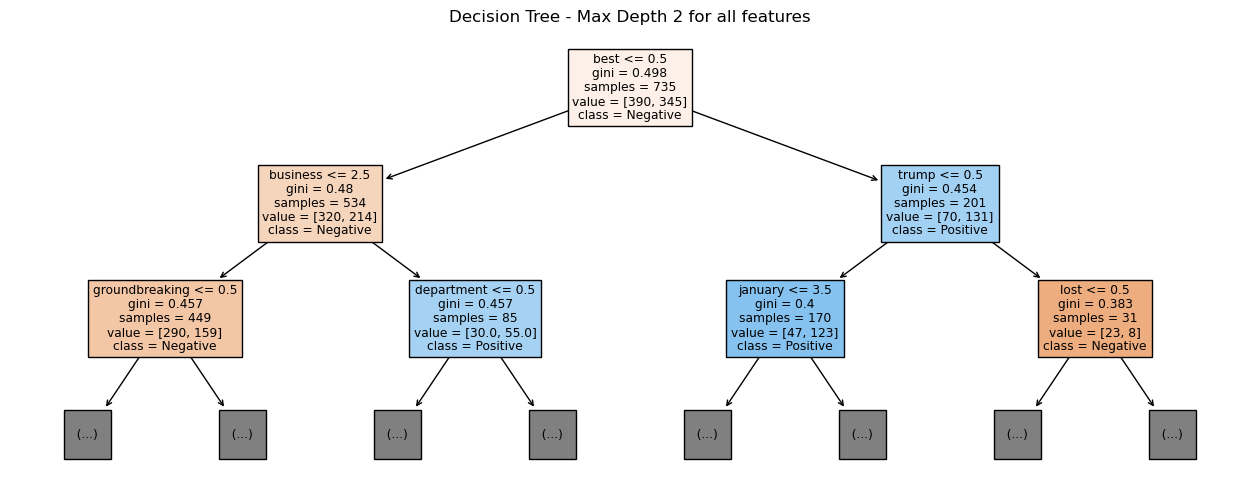

In [20]:
# (10) Visualize First Tree (Default)
plt.figure(figsize=(16,6))
plot_tree(dt_model, max_depth=2, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree - Max Depth 2 for all features")
plt.show()

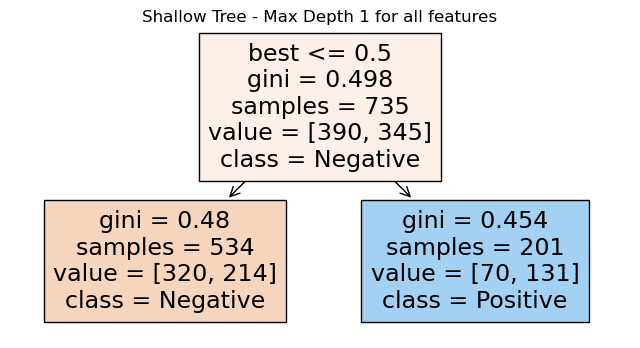

In [21]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
shallow_tree.fit(X_train_full, y_train)
plt.figure(figsize=(8,4))
plot_tree(shallow_tree, feature_names=X.columns, class_names=shallow_tree.classes_, filled=True)
plt.title("Shallow Tree - Max Depth 1 for all features")
plt.show()

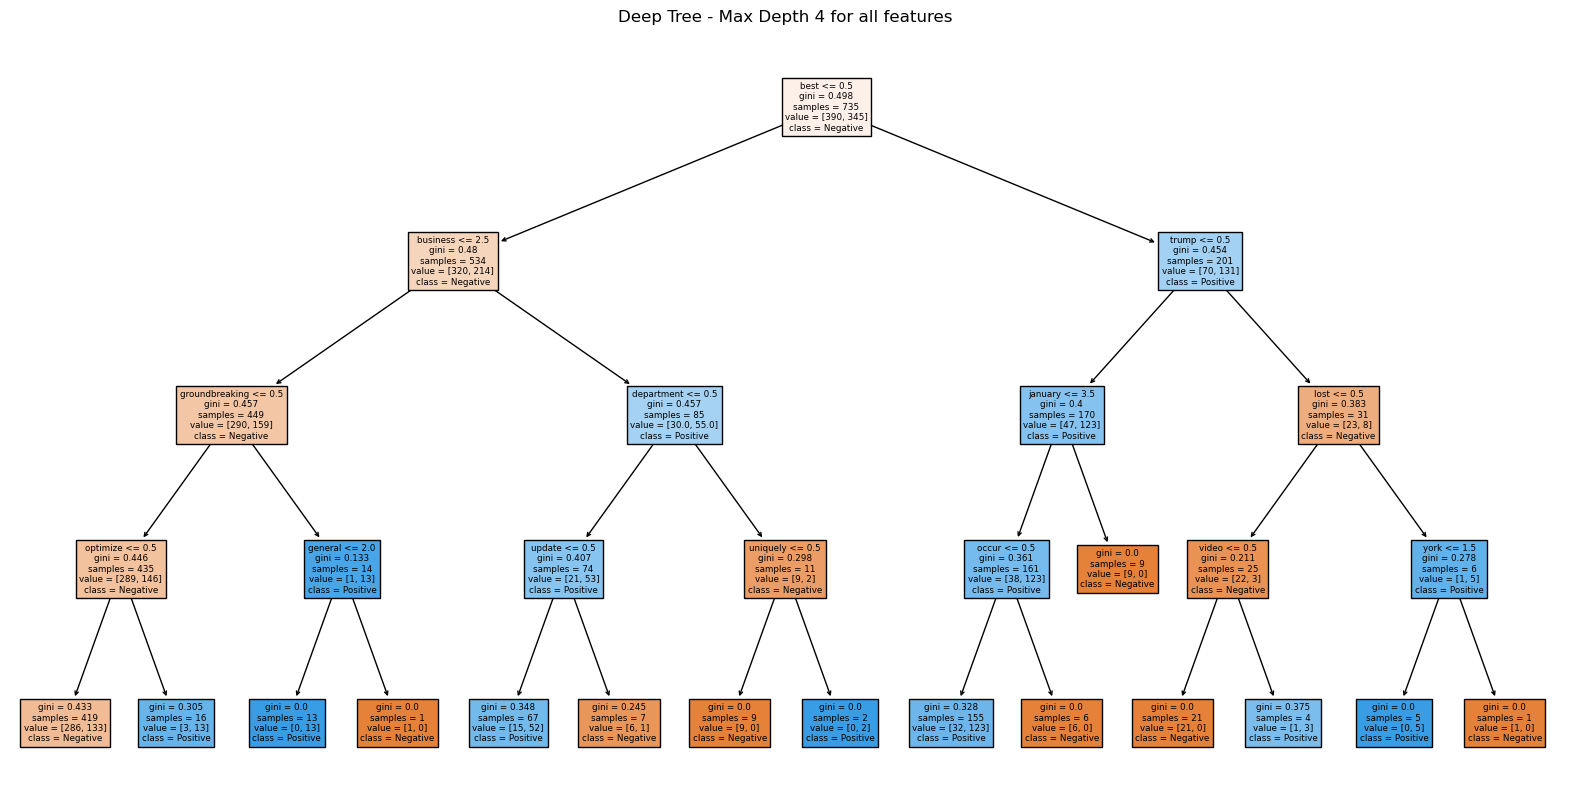

In [22]:
deep_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
deep_tree.fit(X_train_full, y_train)
plt.figure(figsize=(20,10))
plot_tree(deep_tree, feature_names=X.columns, class_names=deep_tree.classes_, filled=True)
plt.title("Deep Tree - Max Depth 4 for all features")
plt.show()

#### Top 100 features

In [23]:
dt_model_top100 = DecisionTreeClassifier(random_state=42)
dt_model_top100.fit(X_train_top100, y_train)

y_pred_dt_top100 = dt_model_top100.predict(X_test_top100)

In [24]:
accuracy = accuracy_score(y_test, y_pred_dt_top100)
print(f"✅ Accuracy of Decision Tree for top 100 features: {accuracy:.4f}")
print("\n📝 Classification Report of Decision Tree for top 100 features:\n")
print(classification_report(y_test, y_pred_dt_top100))

✅ Accuracy of Decision Tree for top 100 features: 0.5761

📝 Classification Report of Decision Tree for top 100 features:

              precision    recall  f1-score   support

    Negative       0.61      0.56      0.59        98
    Positive       0.54      0.59      0.57        86

    accuracy                           0.58       184
   macro avg       0.58      0.58      0.58       184
weighted avg       0.58      0.58      0.58       184



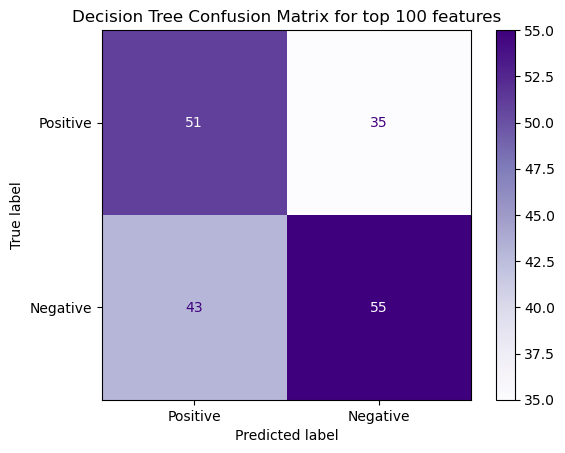

In [25]:
cm = confusion_matrix(y_test, y_pred_dt_top100, labels=["Positive", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Decision Tree Confusion Matrix for top 100 features")
plt.show()

## SVM

In [26]:
data = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_tfidf_vectorized.csv')

In [27]:
X = data.drop("Label", axis=1)
y = data["Label"]

In [28]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [29]:
print("Full Dataset Sample:")
display(data.head())

print("Training Set Sample:")
display(X_train_full.head())

print("Testing Set Sample:")
display(X_test_full.head())

Full Dataset Sample:


,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Negative,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


Training Set Sample:


,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
546,0.0,0.0,0.0,0.000000,0.023539,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.072755,0.0,0.0,0.000000
804,0.0,0.0,0.0,0.012580,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
889,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
191,0.0,0.0,0.0,0.034055,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.052524,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
652,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.078855


Testing Set Sample:


,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
723,0.0,0.0,0.0,0.058113,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.000000,0.046889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print("Training label Sample:")
display(y_train.head())

Training label Sample:


546    Positive
804    Negative
889    Positive
191    Positive
652    Negative
Name: Label, dtype: object

In [31]:
print("Testing label Sample:")
display(y_test.head())

Testing label Sample:


723    Negative
511    Positive
32     Negative
203    Positive
843    Negative
Name: Label, dtype: object

In [32]:
scaler = StandardScaler(with_mean=False)


🔍 Kernel: linear

--- Cost (C) = 0.1 ---
Accuracy of SVM for all features with kernel linear and cost 0.1: 0.7228

📝 Classification Report of SVM for all features with kernel linear and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75        98
    Positive       0.73      0.65      0.69        86

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



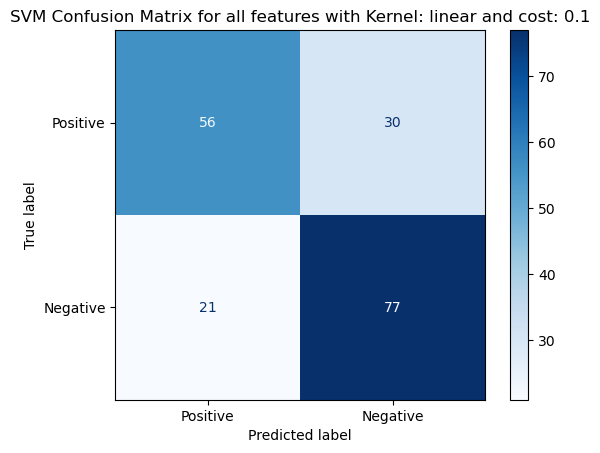


--- Cost (C) = 1 ---
Accuracy of SVM for all features with kernel linear and cost 1: 0.7228

📝 Classification Report of SVM for all features with kernel linear and cost 1:

              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75        98
    Positive       0.73      0.65      0.69        86

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



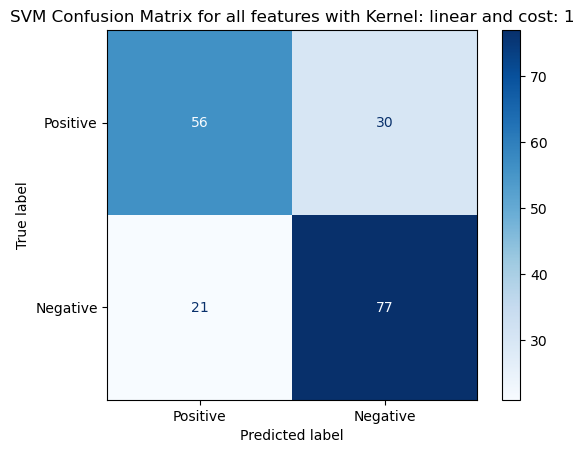


--- Cost (C) = 10 ---
Accuracy of SVM for all features with kernel linear and cost 10: 0.7228

📝 Classification Report of SVM for all features with kernel linear and cost 10:

              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75        98
    Positive       0.73      0.65      0.69        86

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



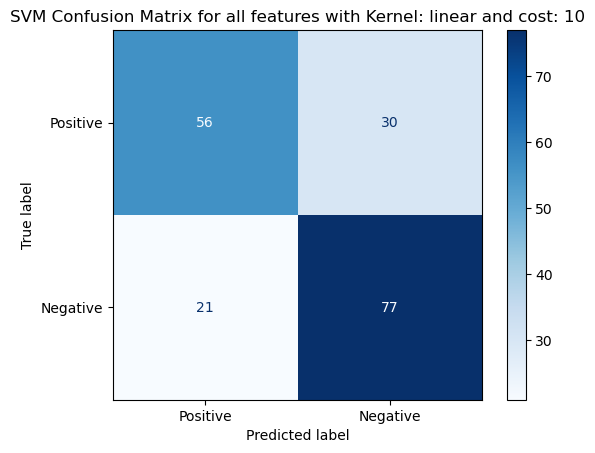


🔍 Kernel: poly

--- Cost (C) = 0.1 ---
Accuracy of SVM for all features with kernel poly and cost 0.1: 0.5435

📝 Classification Report of SVM for all features with kernel poly and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70        98
    Positive       1.00      0.02      0.05        86

    accuracy                           0.54       184
   macro avg       0.77      0.51      0.37       184
weighted avg       0.75      0.54      0.39       184



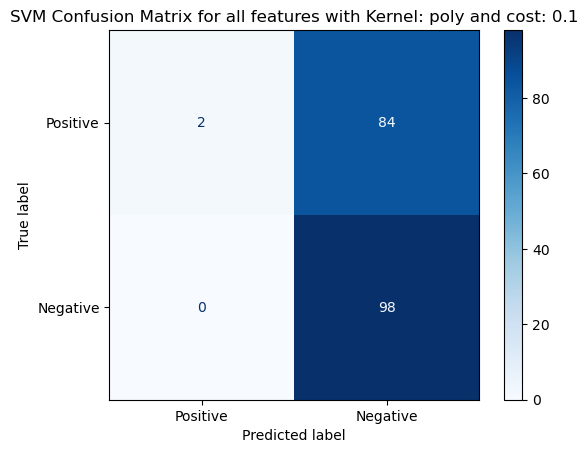


--- Cost (C) = 1 ---
Accuracy of SVM for all features with kernel poly and cost 1: 0.5598

📝 Classification Report of SVM for all features with kernel poly and cost 1:

              precision    recall  f1-score   support

    Negative       0.55      0.99      0.71        98
    Positive       0.86      0.07      0.13        86

    accuracy                           0.56       184
   macro avg       0.70      0.53      0.42       184
weighted avg       0.69      0.56      0.44       184



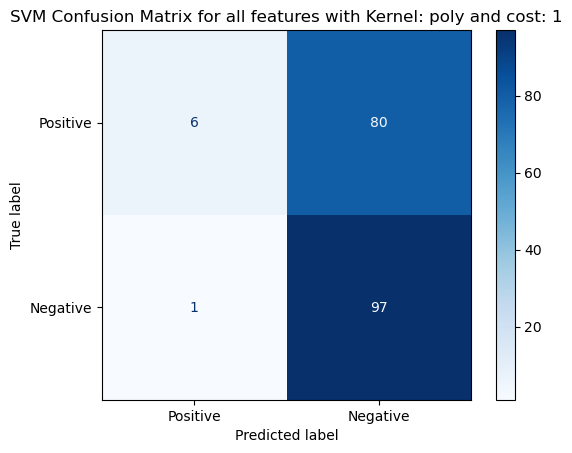


--- Cost (C) = 10 ---
Accuracy of SVM for all features with kernel poly and cost 10: 0.5761

📝 Classification Report of SVM for all features with kernel poly and cost 10:

              precision    recall  f1-score   support

    Negative       0.56      0.94      0.70        98
    Positive       0.70      0.16      0.26        86

    accuracy                           0.58       184
   macro avg       0.63      0.55      0.48       184
weighted avg       0.63      0.58      0.50       184



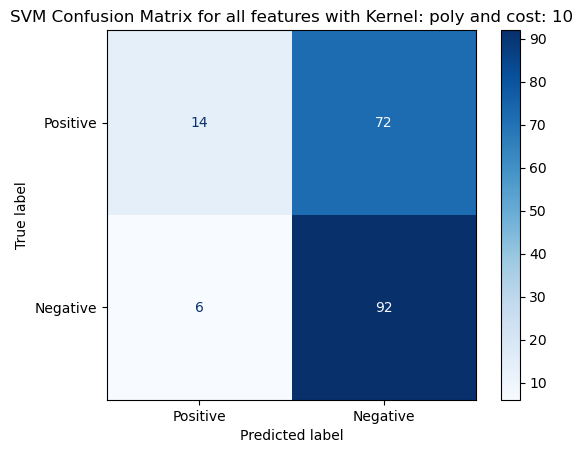


🔍 Kernel: rbf

--- Cost (C) = 0.1 ---
Accuracy of SVM for all features with kernel rbf and cost 0.1: 0.5326

📝 Classification Report of SVM for all features with kernel rbf and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.53      1.00      0.70        98
    Positive       0.00      0.00      0.00        86

    accuracy                           0.53       184
   macro avg       0.27      0.50      0.35       184
weighted avg       0.28      0.53      0.37       184



/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

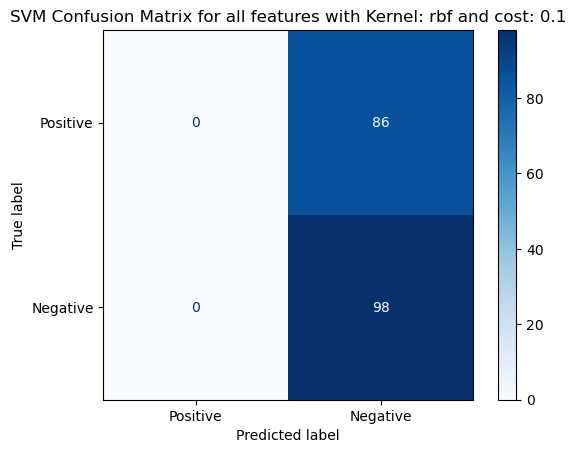


--- Cost (C) = 1 ---
Accuracy of SVM for all features with kernel rbf and cost 1: 0.7065

📝 Classification Report of SVM for all features with kernel rbf and cost 1:

              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72        98
    Positive       0.68      0.70      0.69        86

    accuracy                           0.71       184
   macro avg       0.71      0.71      0.71       184
weighted avg       0.71      0.71      0.71       184



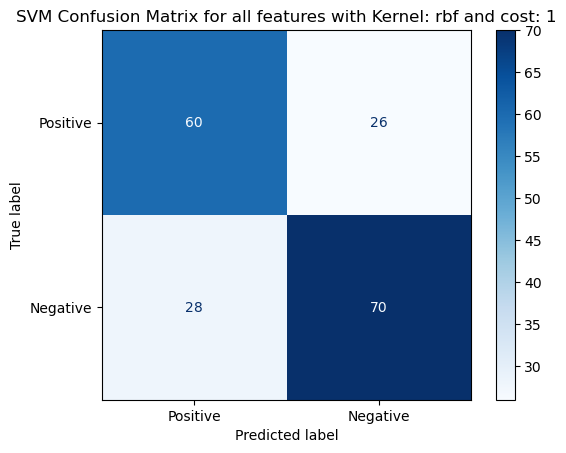


--- Cost (C) = 10 ---
Accuracy of SVM for all features with kernel rbf and cost 10: 0.6957

📝 Classification Report of SVM for all features with kernel rbf and cost 10:

              precision    recall  f1-score   support

    Negative       0.76      0.63      0.69        98
    Positive       0.65      0.77      0.70        86

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



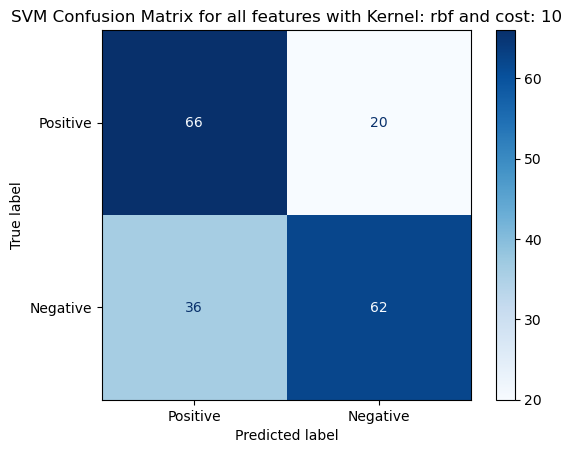

In [33]:
kernels = ["linear", "poly", "rbf"]
costs = [0.1, 1, 10]

for kernel in kernels:
    print(f"\n🔍 Kernel: {kernel}")
    for C in costs:
        print(f"\n--- Cost (C) = {C} ---")
        clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel, C=C, random_state=42))
        clf.fit(X_train_full, y_train)
        y_pred = clf.predict(X_test_full)

        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy of SVM for all features with kernel {kernel} and cost {C}: {acc:.4f}")

        print(f"\n📝 Classification Report of SVM for all features with kernel {kernel} and cost {C}:\n")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative"])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"SVM Confusion Matrix for all features with Kernel: {kernel} and cost: {C}")
        plt.show()

#### Top 100 features

In [34]:
selector = SelectKBest(score_func=chi2, k=100)
X_train_top100 = selector.fit_transform(X_train_full, y_train)
X_test_top100 = selector.transform(X_test_full)


🔍 Kernel: linear

--- Cost (C) = 0.1 ---
Accuracy of SVM for top 100 features with kernel linear and cost 0.1: 0.6739

📝 Classification Report of SVM for top 100 features with kernel linear and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.67      0.77      0.71        98
    Positive       0.68      0.57      0.62        86

    accuracy                           0.67       184
   macro avg       0.68      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



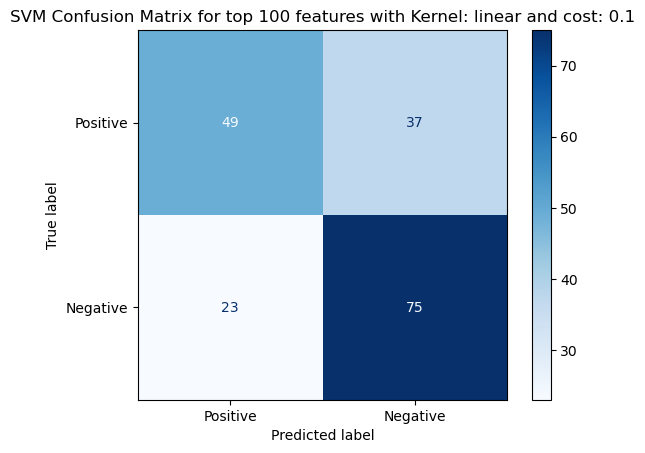


--- Cost (C) = 1 ---
Accuracy of SVM for top 100 features with kernel linear and cost 1: 0.6685

📝 Classification Report of SVM for top 100 features with kernel linear and cost 1:

              precision    recall  f1-score   support

    Negative       0.66      0.77      0.71        98
    Positive       0.68      0.56      0.61        86

    accuracy                           0.67       184
   macro avg       0.67      0.66      0.66       184
weighted avg       0.67      0.67      0.66       184



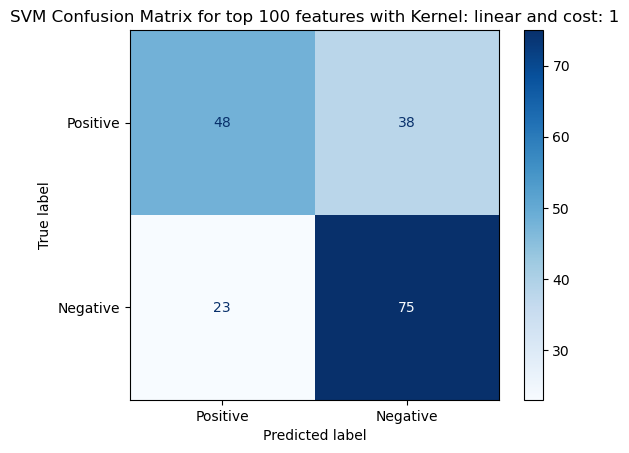


--- Cost (C) = 10 ---
Accuracy of SVM for top 100 features with kernel linear and cost 10: 0.6359

📝 Classification Report of SVM for top 100 features with kernel linear and cost 10:

              precision    recall  f1-score   support

    Negative       0.64      0.72      0.68        98
    Positive       0.63      0.53      0.58        86

    accuracy                           0.64       184
   macro avg       0.63      0.63      0.63       184
weighted avg       0.64      0.64      0.63       184



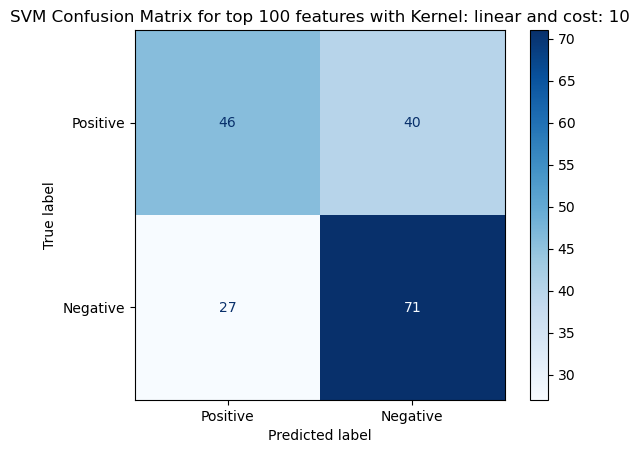


🔍 Kernel: poly

--- Cost (C) = 0.1 ---
Accuracy of SVM for top 100 features with kernel poly and cost 0.1: 0.5652

📝 Classification Report of SVM for top 100 features with kernel poly and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.55      0.97      0.70        98
    Positive       0.75      0.10      0.18        86

    accuracy                           0.57       184
   macro avg       0.65      0.54      0.44       184
weighted avg       0.64      0.57      0.46       184



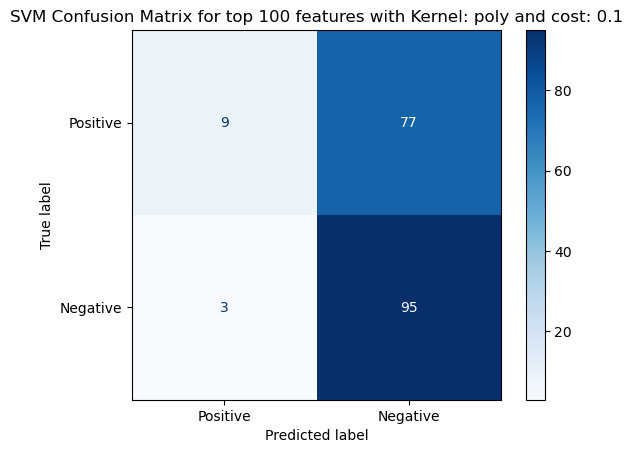


--- Cost (C) = 1 ---
Accuracy of SVM for top 100 features with kernel poly and cost 1: 0.6196

📝 Classification Report of SVM for top 100 features with kernel poly and cost 1:

              precision    recall  f1-score   support

    Negative       0.59      0.95      0.73        98
    Positive       0.81      0.24      0.38        86

    accuracy                           0.62       184
   macro avg       0.70      0.60      0.55       184
weighted avg       0.69      0.62      0.56       184



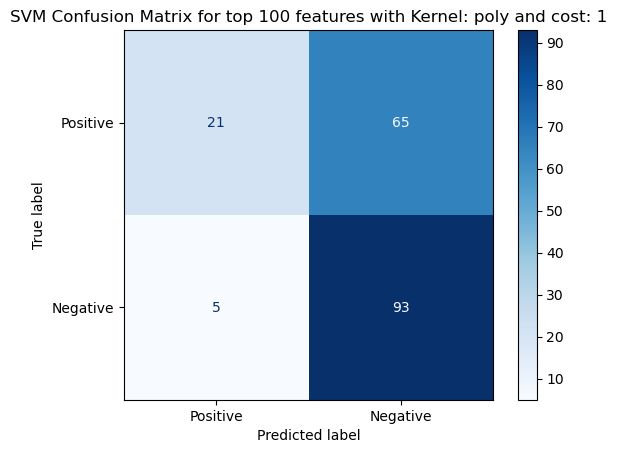


--- Cost (C) = 10 ---
Accuracy of SVM for top 100 features with kernel poly and cost 10: 0.6304

📝 Classification Report of SVM for top 100 features with kernel poly and cost 10:

              precision    recall  f1-score   support

    Negative       0.60      0.91      0.72        98
    Positive       0.75      0.31      0.44        86

    accuracy                           0.63       184
   macro avg       0.68      0.61      0.58       184
weighted avg       0.67      0.63      0.59       184



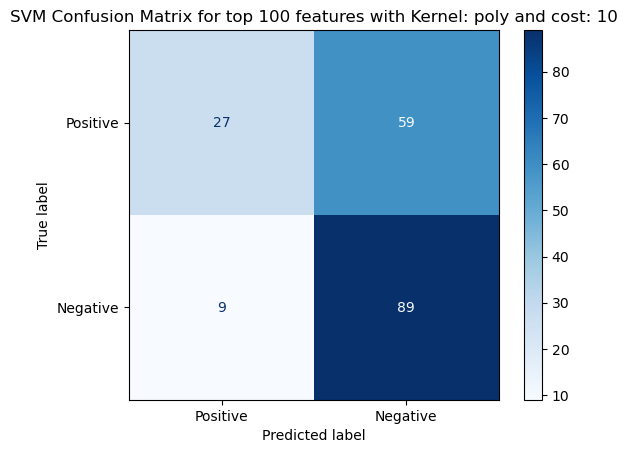


🔍 Kernel: rbf

--- Cost (C) = 0.1 ---
Accuracy of SVM for top 100 features with kernel rbf and cost 0.1: 0.6196

📝 Classification Report of SVM for top 100 features with kernel rbf and cost 0.1:

              precision    recall  f1-score   support

    Negative       0.59      0.97      0.73        98
    Positive       0.86      0.22      0.35        86

    accuracy                           0.62       184
   macro avg       0.73      0.60      0.54       184
weighted avg       0.72      0.62      0.55       184



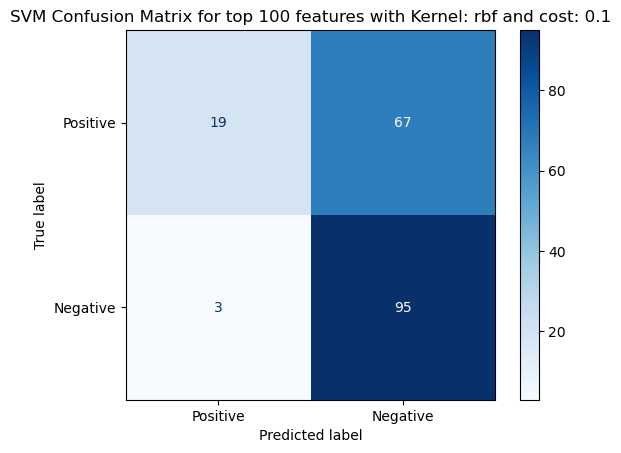


--- Cost (C) = 1 ---
Accuracy of SVM for top 100 features with kernel rbf and cost 1: 0.6848

📝 Classification Report of SVM for top 100 features with kernel rbf and cost 1:

              precision    recall  f1-score   support

    Negative       0.67      0.80      0.73        98
    Positive       0.71      0.56      0.62        86

    accuracy                           0.68       184
   macro avg       0.69      0.68      0.68       184
weighted avg       0.69      0.68      0.68       184



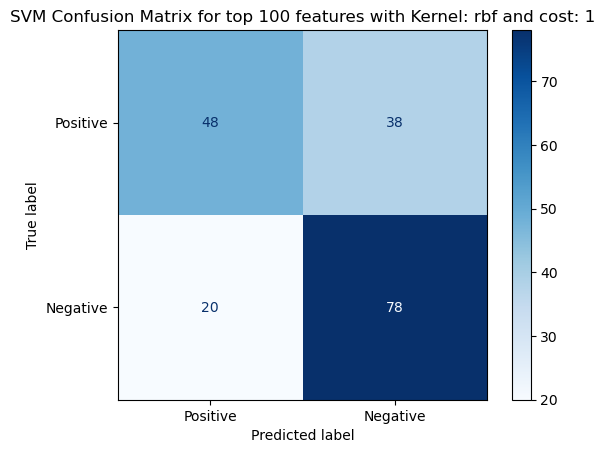


--- Cost (C) = 10 ---
Accuracy of SVM for top 100 features with kernel rbf and cost 10: 0.6630

📝 Classification Report of SVM for top 100 features with kernel rbf and cost 10:

              precision    recall  f1-score   support

    Negative       0.66      0.77      0.71        98
    Positive       0.67      0.55      0.60        86

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.66      0.66      0.66       184



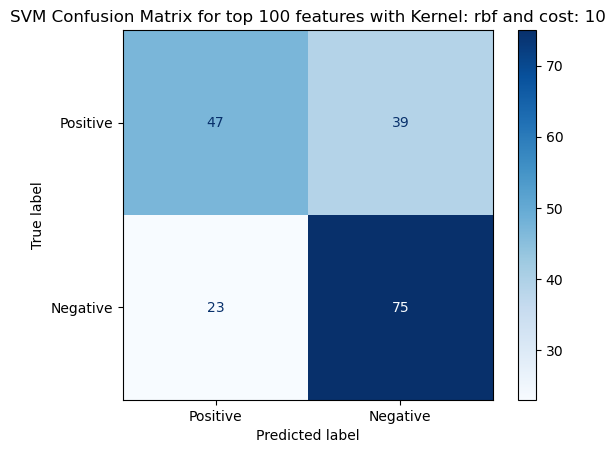

In [35]:
kernels = ["linear", "poly", "rbf"]
costs = [0.1, 1, 10]

for kernel in kernels:
    print(f"\n🔍 Kernel: {kernel}")
    for C in costs:
        print(f"\n--- Cost (C) = {C} ---")
        clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel, C=C, random_state=42))
        clf.fit(X_train_top100, y_train)
        y_pred_100 = clf.predict(X_test_top100)

        acc = accuracy_score(y_test, y_pred_100)
        print(f"Accuracy of SVM for top 100 features with kernel {kernel} and cost {C}: {acc:.4f}")

        print(f"\n📝 Classification Report of SVM for top 100 features with kernel {kernel} and cost {C}:\n")
        print(classification_report(y_test, y_pred_100))

        cm = confusion_matrix(y_test, y_pred_100, labels=["Positive", "Negative"])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"SVM Confusion Matrix for top 100 features with Kernel: {kernel} and cost: {C}")
        plt.show()